In [2]:
pwd

'/home/wsuser/work'

In [3]:
!pip install tensorflow==2.4

     |████████████████████████████████| 394.8 MB 64 kB/s s eta 0:00:01
     |████████████████████████████████| 65 kB 8.2 MB/s  eta 0:00:01
     |████████████████████████████████| 3.8 MB 47.8 MB/s eta 0:00:01
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.35.0
    Uninstalling grpcio-1.35.0:
      Successfully uninstalled grpcio-1.35.0
  Attempting uninstall: opt-einsum
    Found existing installation: opt-einsum 3.1.0
    Uninstalling opt-einsum-3.1.0:
      Successfully uninstalled opt-einsum-3.1.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 20210226132247
    Uninstalling flatbuffers-20210226132247:
      Successfully uninstalled flatbuffers-20210226132247
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.4.3
    Uninstalling tensorflow-2.4.3:
      Successfully uninstalled tensorflow-2.4.3


In [4]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [5]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#performing data agumentation on train data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
#performing data agumentation on test data
test_datagen = ImageDataGenerator(rescale = 1./255)


In [6]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_1d54660c280b489a93342b3024d89a81 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_1d54660c280b489a93342b3024d89a81 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_1d54660c280b489a93342b3024d89a81 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='BW-4pL8ieV4_88UI9dYfRJLp_lM5VcIzKORY2xMUwUIi',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_1d54660c280b489a93342b3024d89a81)

streaming_body_3 = client_1d54660c280b489a93342b3024d89a81.get_object(Bucket='wildplantsedibilityprediction-donotdelete-pr-umogndqvbkktxi', Key='dataset.zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [7]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_3.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [8]:
pwd

'/home/wsuser/work'

In [9]:
import os
filenames = os.listdir('/home/wsuser/work/dataset/training_set')

In [10]:
training_set = train_datagen.flow_from_directory(r'/home/wsuser/work/dataset/training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 624 images belonging to 8 classes.


In [11]:
test_set = test_datagen.flow_from_directory(r'/home/wsuser/work/dataset/test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 269 images belonging to 8 classes.


In [14]:
print(training_set.class_indices)#checking the number of classes

{'Mountain Laurel_nonedible': 0, 'Peppergrass_edible': 1, 'Purple Deadnettle_edible': 2, 'Rhododendron_nonedible': 3, 'Toothwort_edible': 4, 'Wild Grape Vine_edible': 5, 'Wild Leek_edible': 6, 'rattlebox_nonedible': 7}


In [15]:
from collections import Counter as c
c(training_set .labels)

Counter({0: 72, 1: 120, 2: 72, 3: 72, 4: 72, 5: 72, 6: 72, 7: 72})

In [16]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = r'/home/wsuser/work/dataset/training_set'
valid_path = r'/home/wsuser/work/dataset/test_set'


In [17]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [18]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [19]:
  # useful for getting number of output classes
folders = glob(r'/home/wsuser/work/dataset/training_set/*')

In [20]:
folders

['/home/wsuser/work/dataset/training_set/Wild Grape Vine_edible',
 '/home/wsuser/work/dataset/training_set/Peppergrass_edible',
 '/home/wsuser/work/dataset/training_set/rattlebox_nonedible',
 '/home/wsuser/work/dataset/training_set/Purple Deadnettle_edible',
 '/home/wsuser/work/dataset/training_set/Rhododendron_nonedible',
 '/home/wsuser/work/dataset/training_set/Toothwort_edible',
 '/home/wsuser/work/dataset/training_set/Wild Leek_edible',
 '/home/wsuser/work/dataset/training_set/Mountain Laurel_nonedible']

In [21]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [22]:
x

<KerasTensor: shape=(None, 25088) dtype=float32 (created by layer 'flatten')>

In [23]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [24]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [25]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [27]:
r=model.fit_generator(training_set,validation_data=test_set,epochs=10,steps_per_epoch=len(training_set),
  validation_steps=len(test_set))


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
20/20 [==============================] - 371s 19s/step - loss: 2.9289 - accuracy: 0.1735 - val_loss: 1.7483 - val_accuracy: 0.4387
Epoch 2/10
20/20 [==============================] - 372s 19s/step - loss: 1.4343 - accuracy: 0.5042 - val_loss: 1.0800 - val_accuracy: 0.6394
Epoch 3/10
20/20 [==============================] - 371s 19s/step - loss: 0.8205 - accuracy: 0.7395 - val_loss: 1.0628 - val_accuracy: 0.6617
Epoch 4/10
20/20 [==============================] - 370s 19s/step - loss: 0.5781 - accuracy: 0.8427 - val_loss: 1.2922 - val_accuracy: 0.5539
Epoch 5/10
20/20 [==============================] - 371s 19s/step - loss: 0.5080 - accuracy: 0.8589 - val_loss: 0.8822 - val_accuracy: 0.6803
Epoch 6/10
20/20 [==============================] - 371s 19s/step - loss: 0.3847 - accuracy: 0.9032 - val_loss: 0.8838 - val_accuracy: 0.6952
Epoch 7/10
20/20 [==============================] - 372s 19s/step - loss: 0.2963 - accuracy: 0.9370 - val_loss: 0.9528 - val_accuracy: 0.6729
Epoch 

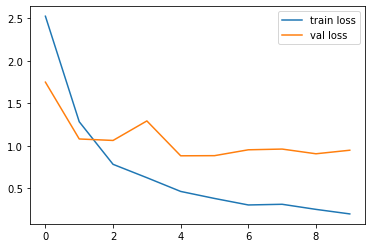

No handles with labels found to put in legend.


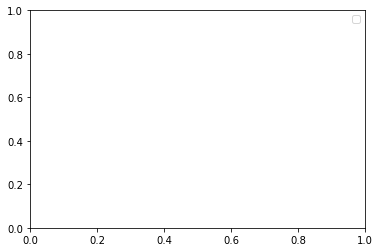

<Figure size 432x288 with 0 Axes>

In [28]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
#plt.plot(r.history['acc'], label='train acc')
#plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [29]:
model.save('wildplants6.h5')

In [30]:
!tar -zcvf wild_plants_edibility_prediction.model_new.tgz wildplant6.h5

tar: wildplant6.h5: Cannot stat: No such file or directory
tar: Exiting with failure status due to previous errors


In [31]:
ls -1

AccVal_acc.png
dataset/
LossVal_loss.png
wildplants6.h5
wild_plants_edibility_prediction.model_new.tgz


In [32]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 26.7 MB/s eta 0:00:01


In [33]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
                "url":"https://us-south.ml.cloud.ibm.com",
                 "apikey":"ZBjsMuX8NYr_t4pgXzWBv6SjwUYRdaS6AvekL_sGm8Jc"
                }
client=APIClient(wml_credentials)

In [34]:
client=APIClient(wml_credentials)

In [35]:
def guid_from_space_name(client,spacename):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==space_name)['metadata']['id'])

In [36]:
client.set.default_space('c8c8a177-424a-4232-8278-8de6d5107690')

'SUCCESS'

In [37]:
client.software_specifications.list(limit=100)

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029

In [38]:
software_spec_uid=client.software_specifications.get_uid_by_name("tensorflow_2.4-py3.8")
software_spec_uid

'fe185c44-9a99-5425-986b-59bd1d2eda46'

In [41]:
model_details=client.repository.store_model(model="wild_plants_edibility_prediction.model_new.tgz",meta_props={
client.repository.ModelMetaNames.NAME:"CNN",
client.repository.ModelMetaNames.TYPE:"tensorflow_2.4",
client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
                                           )
model_id=client.repository.get_model_uid(model_details)

In [42]:
model_id

'702b8b1c-67a5-4a0f-a81d-058d62584ba8'

In [43]:
client.repository.download(model_id,'wildplants6.tar.gz')

Successfully saved model content to file: 'wildplants6.tar.gz'


'/home/wsuser/work/wildplants6.tar.gz'

In [44]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [45]:
model=load_model('wildplants6.h5')

In [46]:

streaming_body_4 = client_1d54660c280b489a93342b3024d89a81.get_object(Bucket='wildplantsedibilityprediction-donotdelete-pr-umogndqvbkktxi', Key='purple-deadnettle.jpg')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [49]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model("wildplants6.h5")


In [52]:
img=image.load_img(r'/home/wsuser/work/dataset/test_set/rattlebox_nonedible/images116.jpg',target_size=(224,224))
x=image.img_to_array(img)
#x=x/255C:\Users\HP\Desktop\Wild_ediblity\dataset\training_set
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
#model.predict(img_data)
a=np.argmax(model.predict(img_data), axis=1)


In [54]:
a

array([7])

In [56]:
index=['Mountain Laurel_nonedible', 'Peppergrass_edible', 'Purple Deadnettle_edible', 'Rhododendron_nonedible', 'Toothwort_edible', 'Wild Grape Vine_edible', 'Wild Leek_edible', 'rattlebox_nonedible']
result=str(index[a[0]])
result

'rattlebox_nonedible'